# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

**b)** Why is it bad for a model to have too many degrees of freedom?

**c)** Why is it bad for a model to have too few degrees of freedom?

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

**e)** Why might we want to use Ridge regression instead of OLS?

**f)** Why migth we want to use OLS instead of Ridge regression?

## Exercise 1 - Answers

**a)** An OLS model fit to the features $x$, $x^2$, $x^3$ and the intercept will have parameters $\theta _1, ..., \theta _4$. So the model including the intercept has 4 degrees of freedom.

**b)** Too many degrees of freedom can cause a variety of issues. The most important issues are overfitting and interpretability loss. Overfitting causes a model to be a perfect fit for the training data, but nothing is generalized from the data. So if we want to predict data that is not in the training data, we can get a huge prediction error. Interpretability loss means that if we have many parameters (degrees of freedom), it is difficult to interpret the physical meaning of each parameter. 

**c)** Too few degrees of freedom can cause underfitting. This means that the model is biased, so predictions are systematically wrong in the same direction. The model is too simple to capture the structure of the data. This means that the model does not explain enough. 

**d)** The expression for the effective degrees of freedom of the ridge regression fit is:
$$
df(\lambda) = \sum_{j=1}^{p}\frac{d_j^2}{d_j^2 + \lambda},
$$
where $d_j^2$ are the eigenvalues (squared singular values) of X. This expression does not include the intercept, so if we include the intercept, the expression becomes:
$$
(\sum_{j=1}^{p}\frac{d_j^2}{d_j^2 + \lambda} )+ 1
$$

**e)** There are multiple reasons. Ridge regression intruduces an extra element on the diagonal on the matrix $(X^TX)$, so the matrix becomes non-singular and you can compute its inverse. In addition, Ridge regression controls overfitting. 

**f)** The OLS gives an unbiased estimate, while the Ridge regression are biased (variance/bias-tradeoff). In addition, the parameters in OLS are easy and intuitive to interpret. 

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

## Exercise 2 - Answers

**a)** We start by defining the cost function as:
$$
C(\boldsymbol{X}, \boldsymbol{\beta}) = \frac{1}{n} \vert \vert \boldsymbol{y} - \boldsymbol{X\beta}\vert \vert _2 ^2 + \lambda\vert\vert\boldsymbol{\beta}\vert\vert _2 ^2
$$
We then use the definition of the 2-norm to rewrite the cost function as:
$$
C(\boldsymbol{X}, \boldsymbol{\beta}) = \frac{1}{n} (\sum_i(y_i - (X\beta)_i)^2 + \lambda \sum_i\beta _i ^2) = \frac{1}{n}((\boldsymbol{y}-\boldsymbol{X\beta})^T(\boldsymbol{y}-\boldsymbol{X\beta}) + \lambda\beta ^T \beta)
$$

Now, we want to differentiate with respect to $\beta$. We use the following result from last weeks exercise:
$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A}.
$$
Differentiating gives:
$$
\frac{\partial C}{\partial \boldsymbol{\beta}}=\frac{\partial}{\partial\boldsymbol\beta}(\frac{1}{n}((\boldsymbol{y}-\boldsymbol{X\beta})^T(\boldsymbol{y}-\boldsymbol{X\beta}) + \lambda\beta ^T \beta)) = \frac{1}{n}(-2(\boldsymbol{y}-\boldsymbol{X\beta})^T\boldsymbol{X} + 2\lambda\boldsymbol{\beta}^T) = \frac{-2}{n}((\boldsymbol{y}-\boldsymbol{X\beta})^T\boldsymbol{X} - \lambda\boldsymbol{\beta}^T)
$$

We equate this to zero:
$$
\frac{-2}{n}((\boldsymbol{y}-\boldsymbol{X\beta})^T\boldsymbol{X} - \lambda\boldsymbol{\beta}^T) = 0 
$$
$$
\Rightarrow (\boldsymbol{y}-\boldsymbol{X\beta})^T\boldsymbol{X} - \lambda\boldsymbol{\beta}^T = 0
$$
$$
\Rightarrow (\boldsymbol{y}-\boldsymbol{X\beta})^T\boldsymbol{X} = \lambda\boldsymbol{\beta}^T
$$
$$
\Rightarrow (\boldsymbol{y}^T-\boldsymbol{\beta}^T\boldsymbol{X}^T)\boldsymbol{X}=\lambda\boldsymbol{\beta}^T
$$
$$
\Rightarrow \boldsymbol{y}^T\boldsymbol{X} - \boldsymbol{\beta}^T\boldsymbol{X}^T\boldsymbol{X} = \lambda \boldsymbol{\beta}^T
$$
Transposing both sides gives:
$$
(\boldsymbol{y}^T\boldsymbol{X})^T - (\boldsymbol{\beta}^T\boldsymbol{X}^T\boldsymbol{X})^T = (\lambda\boldsymbol{\beta}^T)^T
$$
$$
\Rightarrow \boldsymbol{X}^T\boldsymbol{y} - \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} = \lambda \boldsymbol{\beta}
$$
$$
\Rightarrow \boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} + \lambda\boldsymbol{\beta}
$$
$$
\Rightarrow \boldsymbol{X}^T\boldsymbol{y} = (\boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I})\boldsymbol{\beta}, 
$$
where the $p\times p$ identity matrix $\boldsymbol{I}$ ensures that $\lambda\boldsymbol{\beta}$ is treated as a matrix-vector multiplication. Inverting $(\boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I})$, and multiplying both sides by this inverse, gives:
$$
\boldsymbol{\beta} = (\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$

The matrix $(\boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I})$ is invertible because of the parameter $\lambda$ being added on to all diagonal elements. 

## Exercise 3 - Scaling data

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [41]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    # Condition on intercept:
    if intercept==True:
        X = np.zeros((n, p + 1))
        for i in range(p+1):
            X[:, i] = x ** i
            # First column becomes ones because for all x, x**i = 1 when i=0.
    else: 
        X = np.zeros((n, p))
        for i in range(p):
            X[:, i] = x ** (i+1)
    
    return X 

In [42]:
#Printing feature matrix with and without intercept (testing)
"""
X_intercept = polynomial_features(x, 3, intercept=True)
X_notintercept = polynomial_features(x, 3)
print(X_intercept)
print(X_notintercept)
"""

'\nX_intercept = polynomial_features(x, 3, intercept=True)\nX_notintercept = polynomial_features(x, 3)\nprint(X_intercept)\nprint(X_notintercept)\n'

**b)** Split your data into training and test data(80/20 split)

In [43]:
X = polynomial_features(x, 3)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [46]:
def Ridge_parameters(X, y, lam = 1.0):
    # Assumes X is scaled and has no intercept column
    p = X.shape[1]
    return np.linalg.pinv((X.T @ X)+ lam*np.eye(p)) @ X.T @ y

beta = Ridge_parameters(X_train_s, y_train)
#print(beta)

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

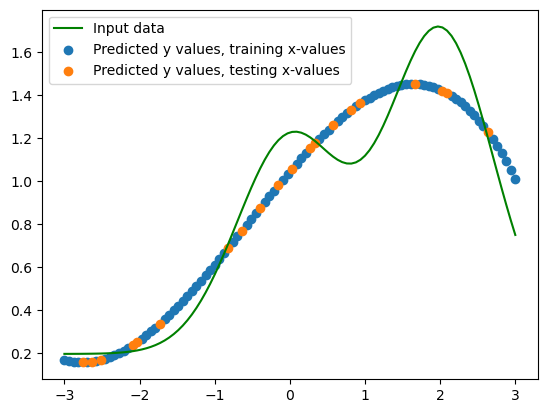

In [47]:
plt.plot(x, y, label = "Input data", color="green")
plt.scatter(x_train, X_train_s @ beta + y_offset, label="Predicted y values, training x-values")
plt.scatter(x_test, X_test_s @ beta + y_offset, label="Predicted y values, testing x-values")
plt.legend()
plt.show()

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).